In [11]:
from __future__ import division, print_function
from tensorflow.python.keras.layers.core import Dense
from tensorflow.python.keras.layers import BatchNormalization
from tensorflow.python.keras.layers.recurrent import LSTM
from tensorflow.python.keras.models import Sequential
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import math
import os
import matplotlib.pyplot as plt
os.environ["CUDA_VISIBLE_DEVICES"] = "" 

In [12]:
data = np.load('/home/chase/Boyka/Lyu/fac_cond256_unit8.npz')
raw_X=data['cond']
raw_Y=data['fac'][:,0]
raw_Y=raw_Y.astype(np.float64)
NUM_TIMESTEPS = 65
HIDDEN_SIZE = 10
BATCH_SIZE = 128   
NUM_EPOCHS = 3000
Xtrain=raw_X[:-1000]
Ytrain=raw_Y[:-1000]
Xtest=raw_X[-1000:]
Ytest=raw_Y[-1000:]


In [13]:
print(Xtrain.shape, Xtest.shape, Ytrain.shape, Ytest.shape)

(2000, 65, 1) (1000, 65, 1) (2000,) (1000,)


In [14]:
model = Sequential()
model.add(LSTM(HIDDEN_SIZE, input_shape=(NUM_TIMESTEPS, 1), return_sequences=True,activation='relu'))
model.add(BatchNormalization())
model.add(LSTM(HIDDEN_SIZE, input_shape=(NUM_TIMESTEPS, 1), return_sequences=True,activation='relu'))
model.add(BatchNormalization())
model.add(LSTM(HIDDEN_SIZE, input_shape=(NUM_TIMESTEPS, 1), return_sequences=True,activation='relu'))
model.add(BatchNormalization())
model.add(LSTM(HIDDEN_SIZE, input_shape=(NUM_TIMESTEPS, 1), return_sequences=True,activation='relu'))
model.add(BatchNormalization())
model.add(LSTM(HIDDEN_SIZE, input_shape=(NUM_TIMESTEPS, 1), return_sequences=False,activation='relu'))
model.add(BatchNormalization())
# model.add(Activation('tanh'))
model.add(Dense(1))
model.summary()

model.compile(loss="mean_absolute_error", optimizer="adam", metrics=["mean_absolute_error"])

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_10 (LSTM)               (None, 65, 10)            480       
_________________________________________________________________
batch_normalization_10 (Batc (None, 65, 10)            40        
_________________________________________________________________
lstm_11 (LSTM)               (None, 65, 10)            840       
_________________________________________________________________
batch_normalization_11 (Batc (None, 65, 10)            40        
_________________________________________________________________
lstm_12 (LSTM)               (None, 65, 10)            840       
_________________________________________________________________
batch_normalization_12 (Batc (None, 65, 10)            40        
_________________________________________________________________
lstm_13 (LSTM)               (None, 65, 10)           

In [15]:
history=model.fit(Xtrain, Ytrain, epochs=NUM_EPOCHS, batch_size=BATCH_SIZE, validation_data=(Xtest, Ytest),shuffle=True)
score, _ = model.evaluate(Xtest, Ytest, batch_size=BATCH_SIZE)
rmse = math.sqrt(score)
model.save('lstm_bn_5000_0.h5')
 

Epoch 1/3000
16/16 [==============================] - 10s 197ms/step - loss: 2.9652 - mean_absolute_error: 2.9652 - val_loss: 2.9023 - val_mean_absolute_error: 2.9023
Epoch 2/3000
16/16 [==============================] - 3s 158ms/step - loss: 2.8825 - mean_absolute_error: 2.8825 - val_loss: 2.8068 - val_mean_absolute_error: 2.8068
Epoch 3/3000
16/16 [==============================] - 3s 173ms/step - loss: 2.7936 - mean_absolute_error: 2.7936 - val_loss: 2.7092 - val_mean_absolute_error: 2.7092
Epoch 4/3000
16/16 [==============================] - 3s 175ms/step - loss: 2.6954 - mean_absolute_error: 2.6954 - val_loss: 2.5983 - val_mean_absolute_error: 2.5983
Epoch 5/3000
16/16 [==============================] - 3s 162ms/step - loss: 2.5868 - mean_absolute_error: 2.5868 - val_loss: 2.4791 - val_mean_absolute_error: 2.4791
Epoch 6/3000
16/16 [==============================] - 3s 162ms/step - loss: 2.4691 - mean_absolute_error: 2.4691 - val_loss: 2.3877 - val_mean_absolute_error: 2.3877
Epo

16/16 [==============================] - 3s 161ms/step - loss: 0.5835 - mean_absolute_error: 0.5835 - val_loss: 0.6695 - val_mean_absolute_error: 0.6695
Epoch 100/3000
16/16 [==============================] - 3s 158ms/step - loss: 0.5881 - mean_absolute_error: 0.5881 - val_loss: 0.7542 - val_mean_absolute_error: 0.7542
Epoch 101/3000
16/16 [==============================] - 3s 161ms/step - loss: 0.5883 - mean_absolute_error: 0.5883 - val_loss: 2.3091 - val_mean_absolute_error: 2.3091
Epoch 102/3000
16/16 [==============================] - 3s 164ms/step - loss: 0.5927 - mean_absolute_error: 0.5927 - val_loss: 0.7084 - val_mean_absolute_error: 0.7084
Epoch 103/3000
16/16 [==============================] - 3s 159ms/step - loss: 0.5840 - mean_absolute_error: 0.5840 - val_loss: 0.6800 - val_mean_absolute_error: 0.6800
Epoch 104/3000
16/16 [==============================] - 3s 168ms/step - loss: 0.5853 - mean_absolute_error: 0.5853 - val_loss: 0.9457 - val_mean_absolute_error: 0.9457
Epoch 1

Epoch 148/3000
16/16 [==============================] - 3s 163ms/step - loss: 0.5779 - mean_absolute_error: 0.5779 - val_loss: 1.1339 - val_mean_absolute_error: 1.1339
Epoch 149/3000
16/16 [==============================] - 3s 158ms/step - loss: 0.5730 - mean_absolute_error: 0.5730 - val_loss: 0.9527 - val_mean_absolute_error: 0.9527
Epoch 150/3000
16/16 [==============================] - 3s 158ms/step - loss: 0.5643 - mean_absolute_error: 0.5643 - val_loss: 1.3713 - val_mean_absolute_error: 1.3713
Epoch 151/3000
16/16 [==============================] - 3s 169ms/step - loss: 0.5599 - mean_absolute_error: 0.5599 - val_loss: 1.9301 - val_mean_absolute_error: 1.9301
Epoch 152/3000
16/16 [==============================] - 3s 168ms/step - loss: 0.5684 - mean_absolute_error: 0.5684 - val_loss: 1.9653 - val_mean_absolute_error: 1.9653
Epoch 153/3000
16/16 [==============================] - 3s 163ms/step - loss: 0.5751 - mean_absolute_error: 0.5751 - val_loss: 0.9311 - val_mean_absolute_error:

Epoch 197/3000
16/16 [==============================] - 3s 159ms/step - loss: 0.5469 - mean_absolute_error: 0.5469 - val_loss: 1.1905 - val_mean_absolute_error: 1.1905
Epoch 198/3000
16/16 [==============================] - 3s 157ms/step - loss: 0.5486 - mean_absolute_error: 0.5486 - val_loss: 1.4971 - val_mean_absolute_error: 1.4971
Epoch 199/3000
16/16 [==============================] - 3s 159ms/step - loss: 0.5514 - mean_absolute_error: 0.5514 - val_loss: 1.4450 - val_mean_absolute_error: 1.4450
Epoch 200/3000
16/16 [==============================] - 2s 154ms/step - loss: 0.5523 - mean_absolute_error: 0.5523 - val_loss: 0.6409 - val_mean_absolute_error: 0.6409
Epoch 201/3000
16/16 [==============================] - 3s 160ms/step - loss: 0.5451 - mean_absolute_error: 0.5451 - val_loss: 0.7500 - val_mean_absolute_error: 0.7500
Epoch 202/3000
16/16 [==============================] - 2s 154ms/step - loss: 0.5491 - mean_absolute_error: 0.5491 - val_loss: 0.6608 - val_mean_absolute_error:

Epoch 246/3000
16/16 [==============================] - 3s 162ms/step - loss: 0.5592 - mean_absolute_error: 0.5592 - val_loss: 0.8321 - val_mean_absolute_error: 0.8321
Epoch 247/3000
16/16 [==============================] - 3s 157ms/step - loss: 0.5516 - mean_absolute_error: 0.5516 - val_loss: 0.8100 - val_mean_absolute_error: 0.8100
Epoch 248/3000
16/16 [==============================] - 3s 167ms/step - loss: 0.5568 - mean_absolute_error: 0.5568 - val_loss: 2.2716 - val_mean_absolute_error: 2.2716
Epoch 249/3000
16/16 [==============================] - 3s 171ms/step - loss: 0.5471 - mean_absolute_error: 0.5471 - val_loss: 1.6271 - val_mean_absolute_error: 1.6271
Epoch 250/3000
16/16 [==============================] - 3s 164ms/step - loss: 0.5462 - mean_absolute_error: 0.5462 - val_loss: 2.2387 - val_mean_absolute_error: 2.2387
Epoch 251/3000
16/16 [==============================] - 3s 168ms/step - loss: 0.5453 - mean_absolute_error: 0.5453 - val_loss: 1.3013 - val_mean_absolute_error:

Epoch 295/3000
16/16 [==============================] - 3s 157ms/step - loss: 0.5343 - mean_absolute_error: 0.5343 - val_loss: 1.0280 - val_mean_absolute_error: 1.0280
Epoch 296/3000
16/16 [==============================] - 2s 155ms/step - loss: 0.5392 - mean_absolute_error: 0.5392 - val_loss: 0.5882 - val_mean_absolute_error: 0.5882
Epoch 297/3000
16/16 [==============================] - 3s 166ms/step - loss: 0.5348 - mean_absolute_error: 0.5348 - val_loss: 0.7676 - val_mean_absolute_error: 0.7676
Epoch 298/3000
16/16 [==============================] - 3s 163ms/step - loss: 0.5355 - mean_absolute_error: 0.5355 - val_loss: 0.6224 - val_mean_absolute_error: 0.6224
Epoch 299/3000
16/16 [==============================] - 3s 158ms/step - loss: 0.5609 - mean_absolute_error: 0.5609 - val_loss: 0.6172 - val_mean_absolute_error: 0.6172
Epoch 300/3000
16/16 [==============================] - 3s 162ms/step - loss: 0.5615 - mean_absolute_error: 0.5615 - val_loss: 2.5286 - val_mean_absolute_error:

Epoch 344/3000
16/16 [==============================] - 2s 155ms/step - loss: 0.5181 - mean_absolute_error: 0.5181 - val_loss: 0.6786 - val_mean_absolute_error: 0.6786
Epoch 345/3000
16/16 [==============================] - 3s 161ms/step - loss: 0.5363 - mean_absolute_error: 0.5363 - val_loss: 0.6369 - val_mean_absolute_error: 0.6369
Epoch 346/3000
16/16 [==============================] - 3s 169ms/step - loss: 0.5316 - mean_absolute_error: 0.5316 - val_loss: 0.8376 - val_mean_absolute_error: 0.8376
Epoch 347/3000
16/16 [==============================] - 3s 163ms/step - loss: 0.5322 - mean_absolute_error: 0.5322 - val_loss: 1.2959 - val_mean_absolute_error: 1.2959
Epoch 348/3000
16/16 [==============================] - 3s 158ms/step - loss: 0.5300 - mean_absolute_error: 0.5300 - val_loss: 1.3309 - val_mean_absolute_error: 1.3309
Epoch 349/3000
16/16 [==============================] - 3s 163ms/step - loss: 0.5321 - mean_absolute_error: 0.5321 - val_loss: 0.9358 - val_mean_absolute_error:

Epoch 393/3000
16/16 [==============================] - 3s 160ms/step - loss: 0.5339 - mean_absolute_error: 0.5339 - val_loss: 0.9903 - val_mean_absolute_error: 0.9903
Epoch 394/3000
16/16 [==============================] - 3s 169ms/step - loss: 0.5546 - mean_absolute_error: 0.5546 - val_loss: 2.5095 - val_mean_absolute_error: 2.5095
Epoch 395/3000
16/16 [==============================] - 3s 157ms/step - loss: 0.5309 - mean_absolute_error: 0.5309 - val_loss: 1.6721 - val_mean_absolute_error: 1.6721
Epoch 396/3000
16/16 [==============================] - 3s 161ms/step - loss: 0.5146 - mean_absolute_error: 0.5146 - val_loss: 1.7473 - val_mean_absolute_error: 1.7473
Epoch 397/3000
16/16 [==============================] - 3s 162ms/step - loss: 0.5416 - mean_absolute_error: 0.5416 - val_loss: 1.6405 - val_mean_absolute_error: 1.6405
Epoch 398/3000
16/16 [==============================] - 3s 159ms/step - loss: 0.5339 - mean_absolute_error: 0.5339 - val_loss: 0.9718 - val_mean_absolute_error:

Epoch 442/3000
16/16 [==============================] - 3s 165ms/step - loss: 0.5135 - mean_absolute_error: 0.5135 - val_loss: 0.6817 - val_mean_absolute_error: 0.6817
Epoch 443/3000
16/16 [==============================] - 2s 156ms/step - loss: 0.5143 - mean_absolute_error: 0.5143 - val_loss: 0.9801 - val_mean_absolute_error: 0.9801
Epoch 444/3000
16/16 [==============================] - 3s 157ms/step - loss: 0.5147 - mean_absolute_error: 0.5147 - val_loss: 0.5996 - val_mean_absolute_error: 0.5996
Epoch 445/3000
16/16 [==============================] - 3s 162ms/step - loss: 0.5170 - mean_absolute_error: 0.5170 - val_loss: 0.7350 - val_mean_absolute_error: 0.7350
Epoch 446/3000
16/16 [==============================] - 2s 158ms/step - loss: 0.5082 - mean_absolute_error: 0.5082 - val_loss: 0.9306 - val_mean_absolute_error: 0.9306
Epoch 447/3000
16/16 [==============================] - 3s 158ms/step - loss: 0.5178 - mean_absolute_error: 0.5178 - val_loss: 0.8012 - val_mean_absolute_error:

Epoch 491/3000
16/16 [==============================] - 3s 157ms/step - loss: 0.5202 - mean_absolute_error: 0.5202 - val_loss: 1.4782 - val_mean_absolute_error: 1.4782
Epoch 492/3000
16/16 [==============================] - 3s 160ms/step - loss: 0.5177 - mean_absolute_error: 0.5177 - val_loss: 1.2932 - val_mean_absolute_error: 1.2932
Epoch 493/3000
16/16 [==============================] - 3s 159ms/step - loss: 0.5062 - mean_absolute_error: 0.5062 - val_loss: 1.9192 - val_mean_absolute_error: 1.9192
Epoch 494/3000
16/16 [==============================] - 3s 159ms/step - loss: 0.5338 - mean_absolute_error: 0.5338 - val_loss: 2.3783 - val_mean_absolute_error: 2.3783
Epoch 495/3000
16/16 [==============================] - 2s 155ms/step - loss: 0.5186 - mean_absolute_error: 0.5186 - val_loss: 0.7517 - val_mean_absolute_error: 0.7517
Epoch 496/3000
16/16 [==============================] - 3s 164ms/step - loss: 0.5266 - mean_absolute_error: 0.5266 - val_loss: 1.3451 - val_mean_absolute_error:

Epoch 540/3000
16/16 [==============================] - 2s 155ms/step - loss: 0.5286 - mean_absolute_error: 0.5286 - val_loss: 0.6587 - val_mean_absolute_error: 0.6587
Epoch 541/3000
16/16 [==============================] - 2s 158ms/step - loss: 0.5189 - mean_absolute_error: 0.5189 - val_loss: 1.1247 - val_mean_absolute_error: 1.1247
Epoch 542/3000
16/16 [==============================] - 3s 158ms/step - loss: 0.5166 - mean_absolute_error: 0.5166 - val_loss: 1.3053 - val_mean_absolute_error: 1.3053
Epoch 543/3000
16/16 [==============================] - 3s 159ms/step - loss: 0.5020 - mean_absolute_error: 0.5020 - val_loss: 1.1656 - val_mean_absolute_error: 1.1656
Epoch 544/3000
16/16 [==============================] - 3s 161ms/step - loss: 0.5043 - mean_absolute_error: 0.5043 - val_loss: 0.8221 - val_mean_absolute_error: 0.8221
Epoch 545/3000
16/16 [==============================] - 3s 170ms/step - loss: 0.5093 - mean_absolute_error: 0.5093 - val_loss: 0.5920 - val_mean_absolute_error:

Epoch 589/3000
16/16 [==============================] - 3s 159ms/step - loss: 0.5073 - mean_absolute_error: 0.5073 - val_loss: 1.2385 - val_mean_absolute_error: 1.2385
Epoch 590/3000
16/16 [==============================] - 2s 152ms/step - loss: 0.5002 - mean_absolute_error: 0.5002 - val_loss: 0.7372 - val_mean_absolute_error: 0.7372
Epoch 591/3000
16/16 [==============================] - 2s 158ms/step - loss: 0.5047 - mean_absolute_error: 0.5047 - val_loss: 0.5939 - val_mean_absolute_error: 0.5939
Epoch 592/3000
16/16 [==============================] - 2s 157ms/step - loss: 0.4948 - mean_absolute_error: 0.4948 - val_loss: 0.6407 - val_mean_absolute_error: 0.6407
Epoch 593/3000
16/16 [==============================] - 3s 164ms/step - loss: 0.5041 - mean_absolute_error: 0.5041 - val_loss: 0.7652 - val_mean_absolute_error: 0.7652
Epoch 594/3000
16/16 [==============================] - 3s 161ms/step - loss: 0.5089 - mean_absolute_error: 0.5089 - val_loss: 0.9279 - val_mean_absolute_error:

Epoch 638/3000
16/16 [==============================] - 3s 160ms/step - loss: 0.5027 - mean_absolute_error: 0.5027 - val_loss: 1.5803 - val_mean_absolute_error: 1.5803
Epoch 639/3000
16/16 [==============================] - 2s 155ms/step - loss: 0.5004 - mean_absolute_error: 0.5004 - val_loss: 1.0032 - val_mean_absolute_error: 1.0032
Epoch 640/3000
16/16 [==============================] - 3s 164ms/step - loss: 0.5050 - mean_absolute_error: 0.5050 - val_loss: 0.6510 - val_mean_absolute_error: 0.6510
Epoch 641/3000
16/16 [==============================] - 3s 161ms/step - loss: 0.5046 - mean_absolute_error: 0.5046 - val_loss: 0.9062 - val_mean_absolute_error: 0.9062
Epoch 642/3000
16/16 [==============================] - 3s 168ms/step - loss: 0.4959 - mean_absolute_error: 0.4959 - val_loss: 0.6790 - val_mean_absolute_error: 0.6790
Epoch 643/3000
16/16 [==============================] - 3s 165ms/step - loss: 0.4992 - mean_absolute_error: 0.4992 - val_loss: 1.9292 - val_mean_absolute_error:

Epoch 687/3000
16/16 [==============================] - 3s 159ms/step - loss: 0.4881 - mean_absolute_error: 0.4881 - val_loss: 0.7138 - val_mean_absolute_error: 0.7138
Epoch 688/3000
16/16 [==============================] - 3s 165ms/step - loss: 0.4986 - mean_absolute_error: 0.4986 - val_loss: 1.4998 - val_mean_absolute_error: 1.4998
Epoch 689/3000
16/16 [==============================] - 3s 161ms/step - loss: 0.4870 - mean_absolute_error: 0.4870 - val_loss: 2.0415 - val_mean_absolute_error: 2.0415
Epoch 690/3000
16/16 [==============================] - 2s 156ms/step - loss: 0.4916 - mean_absolute_error: 0.4916 - val_loss: 0.8661 - val_mean_absolute_error: 0.8661
Epoch 691/3000
16/16 [==============================] - 2s 157ms/step - loss: 0.4987 - mean_absolute_error: 0.4987 - val_loss: 0.7212 - val_mean_absolute_error: 0.7212
Epoch 692/3000
16/16 [==============================] - 3s 166ms/step - loss: 0.4966 - mean_absolute_error: 0.4966 - val_loss: 0.7863 - val_mean_absolute_error:

Epoch 736/3000
16/16 [==============================] - 3s 159ms/step - loss: 0.4928 - mean_absolute_error: 0.4928 - val_loss: 0.6649 - val_mean_absolute_error: 0.6649
Epoch 737/3000
16/16 [==============================] - 3s 161ms/step - loss: 0.5045 - mean_absolute_error: 0.5045 - val_loss: 0.8562 - val_mean_absolute_error: 0.8562
Epoch 738/3000
16/16 [==============================] - 3s 163ms/step - loss: 0.4978 - mean_absolute_error: 0.4978 - val_loss: 0.8315 - val_mean_absolute_error: 0.8315
Epoch 739/3000
16/16 [==============================] - 3s 160ms/step - loss: 0.4971 - mean_absolute_error: 0.4971 - val_loss: 0.9265 - val_mean_absolute_error: 0.9265
Epoch 740/3000
16/16 [==============================] - 3s 158ms/step - loss: 0.4909 - mean_absolute_error: 0.4909 - val_loss: 0.6516 - val_mean_absolute_error: 0.6516
Epoch 741/3000
16/16 [==============================] - 3s 162ms/step - loss: 0.4888 - mean_absolute_error: 0.4888 - val_loss: 0.7094 - val_mean_absolute_error:

Epoch 785/3000
16/16 [==============================] - 2s 157ms/step - loss: 0.4815 - mean_absolute_error: 0.4815 - val_loss: 0.5853 - val_mean_absolute_error: 0.5853
Epoch 786/3000
16/16 [==============================] - 3s 159ms/step - loss: 0.4816 - mean_absolute_error: 0.4816 - val_loss: 1.3845 - val_mean_absolute_error: 1.3845
Epoch 787/3000
16/16 [==============================] - 3s 160ms/step - loss: 0.4756 - mean_absolute_error: 0.4756 - val_loss: 1.5368 - val_mean_absolute_error: 1.5368
Epoch 788/3000
16/16 [==============================] - 3s 157ms/step - loss: 0.4886 - mean_absolute_error: 0.4886 - val_loss: 0.7350 - val_mean_absolute_error: 0.7350
Epoch 789/3000
16/16 [==============================] - 3s 159ms/step - loss: 0.4849 - mean_absolute_error: 0.4849 - val_loss: 0.6283 - val_mean_absolute_error: 0.6283
Epoch 790/3000
16/16 [==============================] - 3s 163ms/step - loss: 0.4919 - mean_absolute_error: 0.4919 - val_loss: 0.7504 - val_mean_absolute_error:

Epoch 834/3000
16/16 [==============================] - 2s 153ms/step - loss: 0.4845 - mean_absolute_error: 0.4845 - val_loss: 0.6102 - val_mean_absolute_error: 0.6102
Epoch 835/3000
16/16 [==============================] - 3s 161ms/step - loss: 0.4957 - mean_absolute_error: 0.4957 - val_loss: 0.9132 - val_mean_absolute_error: 0.9132
Epoch 836/3000
16/16 [==============================] - 2s 156ms/step - loss: 0.4949 - mean_absolute_error: 0.4949 - val_loss: 1.4658 - val_mean_absolute_error: 1.4658
Epoch 837/3000
16/16 [==============================] - 2s 155ms/step - loss: 0.4870 - mean_absolute_error: 0.4870 - val_loss: 0.7729 - val_mean_absolute_error: 0.7729
Epoch 838/3000
16/16 [==============================] - 2s 150ms/step - loss: 0.4953 - mean_absolute_error: 0.4953 - val_loss: 1.2820 - val_mean_absolute_error: 1.2820
Epoch 839/3000
16/16 [==============================] - 3s 160ms/step - loss: 0.4717 - mean_absolute_error: 0.4717 - val_loss: 0.6864 - val_mean_absolute_error:

Epoch 883/3000
16/16 [==============================] - 3s 163ms/step - loss: 0.4756 - mean_absolute_error: 0.4756 - val_loss: 0.7467 - val_mean_absolute_error: 0.7467
Epoch 884/3000
16/16 [==============================] - 3s 162ms/step - loss: 0.4859 - mean_absolute_error: 0.4859 - val_loss: 0.8300 - val_mean_absolute_error: 0.8300
Epoch 885/3000
16/16 [==============================] - 2s 151ms/step - loss: 0.4764 - mean_absolute_error: 0.4764 - val_loss: 1.1560 - val_mean_absolute_error: 1.1560
Epoch 886/3000
16/16 [==============================] - 3s 159ms/step - loss: 0.4969 - mean_absolute_error: 0.4969 - val_loss: 1.2939 - val_mean_absolute_error: 1.2939
Epoch 887/3000
16/16 [==============================] - 3s 159ms/step - loss: 0.4935 - mean_absolute_error: 0.4935 - val_loss: 0.7189 - val_mean_absolute_error: 0.7189
Epoch 888/3000
16/16 [==============================] - 2s 155ms/step - loss: 0.4851 - mean_absolute_error: 0.4851 - val_loss: 0.8053 - val_mean_absolute_error:

Epoch 932/3000
16/16 [==============================] - 2s 153ms/step - loss: 0.4861 - mean_absolute_error: 0.4861 - val_loss: 1.0507 - val_mean_absolute_error: 1.0507
Epoch 933/3000
16/16 [==============================] - 3s 159ms/step - loss: 0.4776 - mean_absolute_error: 0.4776 - val_loss: 0.7430 - val_mean_absolute_error: 0.7430
Epoch 934/3000
16/16 [==============================] - 3s 163ms/step - loss: 0.4803 - mean_absolute_error: 0.4803 - val_loss: 0.8332 - val_mean_absolute_error: 0.8332
Epoch 935/3000
16/16 [==============================] - 3s 159ms/step - loss: 0.4945 - mean_absolute_error: 0.4945 - val_loss: 1.9333 - val_mean_absolute_error: 1.9333
Epoch 936/3000
16/16 [==============================] - 2s 156ms/step - loss: 0.5002 - mean_absolute_error: 0.5002 - val_loss: 1.6528 - val_mean_absolute_error: 1.6528
Epoch 937/3000
16/16 [==============================] - 3s 168ms/step - loss: 0.4922 - mean_absolute_error: 0.4922 - val_loss: 2.1851 - val_mean_absolute_error:

Epoch 981/3000
16/16 [==============================] - 3s 160ms/step - loss: 0.4840 - mean_absolute_error: 0.4840 - val_loss: 1.2540 - val_mean_absolute_error: 1.2540
Epoch 982/3000
16/16 [==============================] - 3s 160ms/step - loss: 0.4875 - mean_absolute_error: 0.4875 - val_loss: 0.5730 - val_mean_absolute_error: 0.5730
Epoch 983/3000
16/16 [==============================] - 3s 161ms/step - loss: 0.4867 - mean_absolute_error: 0.4867 - val_loss: 0.6312 - val_mean_absolute_error: 0.6312
Epoch 984/3000
16/16 [==============================] - 3s 163ms/step - loss: 0.4848 - mean_absolute_error: 0.4848 - val_loss: 0.7190 - val_mean_absolute_error: 0.7190
Epoch 985/3000
16/16 [==============================] - 2s 153ms/step - loss: 0.4703 - mean_absolute_error: 0.4703 - val_loss: 0.7759 - val_mean_absolute_error: 0.7759
Epoch 986/3000
16/16 [==============================] - 3s 165ms/step - loss: 0.4763 - mean_absolute_error: 0.4763 - val_loss: 1.5355 - val_mean_absolute_error:

16/16 [==============================] - 3s 162ms/step - loss: 0.4699 - mean_absolute_error: 0.4699 - val_loss: 0.9673 - val_mean_absolute_error: 0.9673
Epoch 1078/3000
16/16 [==============================] - 2s 155ms/step - loss: 0.4782 - mean_absolute_error: 0.4782 - val_loss: 2.2860 - val_mean_absolute_error: 2.2860
Epoch 1079/3000
16/16 [==============================] - 3s 161ms/step - loss: 0.4707 - mean_absolute_error: 0.4707 - val_loss: 0.5903 - val_mean_absolute_error: 0.5903
Epoch 1080/3000
16/16 [==============================] - 3s 165ms/step - loss: 0.4701 - mean_absolute_error: 0.4701 - val_loss: 0.6963 - val_mean_absolute_error: 0.6963
Epoch 1081/3000
16/16 [==============================] - 3s 159ms/step - loss: 0.4757 - mean_absolute_error: 0.4757 - val_loss: 1.1254 - val_mean_absolute_error: 1.1254
Epoch 1082/3000
16/16 [==============================] - 3s 164ms/step - loss: 0.4811 - mean_absolute_error: 0.4811 - val_loss: 0.5824 - val_mean_absolute_error: 0.5824
Ep

16/16 [==============================] - 2s 156ms/step - loss: 0.4655 - mean_absolute_error: 0.4655 - val_loss: 0.7021 - val_mean_absolute_error: 0.7021
Epoch 1174/3000
16/16 [==============================] - 2s 155ms/step - loss: 0.4646 - mean_absolute_error: 0.4646 - val_loss: 0.5490 - val_mean_absolute_error: 0.5490
Epoch 1175/3000
16/16 [==============================] - 3s 157ms/step - loss: 0.4588 - mean_absolute_error: 0.4588 - val_loss: 0.8174 - val_mean_absolute_error: 0.8174
Epoch 1176/3000
16/16 [==============================] - 3s 158ms/step - loss: 0.4618 - mean_absolute_error: 0.4618 - val_loss: 1.2405 - val_mean_absolute_error: 1.2405
Epoch 1177/3000
16/16 [==============================] - 3s 162ms/step - loss: 0.4695 - mean_absolute_error: 0.4695 - val_loss: 0.8649 - val_mean_absolute_error: 0.8649
Epoch 1178/3000
16/16 [==============================] - 2s 156ms/step - loss: 0.4620 - mean_absolute_error: 0.4620 - val_loss: 0.7983 - val_mean_absolute_error: 0.7983
Ep

16/16 [==============================] - 3s 160ms/step - loss: 0.4652 - mean_absolute_error: 0.4652 - val_loss: 1.0112 - val_mean_absolute_error: 1.0112
Epoch 1270/3000
16/16 [==============================] - 3s 163ms/step - loss: 0.4757 - mean_absolute_error: 0.4757 - val_loss: 1.1659 - val_mean_absolute_error: 1.1659
Epoch 1271/3000
16/16 [==============================] - 3s 159ms/step - loss: 0.4824 - mean_absolute_error: 0.4824 - val_loss: 0.8342 - val_mean_absolute_error: 0.8342
Epoch 1272/3000
16/16 [==============================] - 3s 157ms/step - loss: 0.4763 - mean_absolute_error: 0.4763 - val_loss: 0.7716 - val_mean_absolute_error: 0.7716
Epoch 1273/3000
16/16 [==============================] - 3s 160ms/step - loss: 0.4731 - mean_absolute_error: 0.4731 - val_loss: 0.6082 - val_mean_absolute_error: 0.6082
Epoch 1274/3000
16/16 [==============================] - 3s 158ms/step - loss: 0.4697 - mean_absolute_error: 0.4697 - val_loss: 0.6050 - val_mean_absolute_error: 0.6050
Ep

16/16 [==============================] - 3s 167ms/step - loss: 0.4504 - mean_absolute_error: 0.4504 - val_loss: 0.6919 - val_mean_absolute_error: 0.6919
Epoch 1366/3000
16/16 [==============================] - 2s 156ms/step - loss: 0.4505 - mean_absolute_error: 0.4505 - val_loss: 1.4149 - val_mean_absolute_error: 1.4149
Epoch 1367/3000
16/16 [==============================] - 3s 160ms/step - loss: 0.4501 - mean_absolute_error: 0.4501 - val_loss: 1.1414 - val_mean_absolute_error: 1.1414
Epoch 1368/3000
16/16 [==============================] - 3s 158ms/step - loss: 0.4544 - mean_absolute_error: 0.4544 - val_loss: 0.6368 - val_mean_absolute_error: 0.6368
Epoch 1369/3000
16/16 [==============================] - 2s 152ms/step - loss: 0.4621 - mean_absolute_error: 0.4621 - val_loss: 0.5717 - val_mean_absolute_error: 0.5717
Epoch 1370/3000
16/16 [==============================] - 3s 157ms/step - loss: 0.4512 - mean_absolute_error: 0.4512 - val_loss: 0.8556 - val_mean_absolute_error: 0.8556
Ep

16/16 [==============================] - 3s 164ms/step - loss: 0.4510 - mean_absolute_error: 0.4510 - val_loss: 0.7803 - val_mean_absolute_error: 0.7803
Epoch 1462/3000
16/16 [==============================] - 2s 156ms/step - loss: 0.4373 - mean_absolute_error: 0.4373 - val_loss: 0.5714 - val_mean_absolute_error: 0.5714
Epoch 1463/3000
16/16 [==============================] - 3s 159ms/step - loss: 0.4607 - mean_absolute_error: 0.4607 - val_loss: 0.6650 - val_mean_absolute_error: 0.6650
Epoch 1464/3000
16/16 [==============================] - 3s 159ms/step - loss: 0.4440 - mean_absolute_error: 0.4440 - val_loss: 0.6147 - val_mean_absolute_error: 0.6147
Epoch 1465/3000
16/16 [==============================] - 3s 160ms/step - loss: 0.4476 - mean_absolute_error: 0.4476 - val_loss: 0.6897 - val_mean_absolute_error: 0.6897
Epoch 1466/3000
16/16 [==============================] - 3s 161ms/step - loss: 0.4406 - mean_absolute_error: 0.4406 - val_loss: 1.1481 - val_mean_absolute_error: 1.1481
Ep

16/16 [==============================] - 3s 162ms/step - loss: 0.4359 - mean_absolute_error: 0.4359 - val_loss: 0.6172 - val_mean_absolute_error: 0.6172
Epoch 1558/3000
16/16 [==============================] - 3s 162ms/step - loss: 0.4414 - mean_absolute_error: 0.4414 - val_loss: 0.8816 - val_mean_absolute_error: 0.8816
Epoch 1559/3000
16/16 [==============================] - 2s 154ms/step - loss: 0.4448 - mean_absolute_error: 0.4448 - val_loss: 0.8091 - val_mean_absolute_error: 0.8091
Epoch 1560/3000
16/16 [==============================] - 3s 162ms/step - loss: 0.4384 - mean_absolute_error: 0.4384 - val_loss: 1.0274 - val_mean_absolute_error: 1.0274
Epoch 1561/3000
16/16 [==============================] - 3s 158ms/step - loss: 0.4493 - mean_absolute_error: 0.4493 - val_loss: 0.6058 - val_mean_absolute_error: 0.6058
Epoch 1562/3000
16/16 [==============================] - 3s 162ms/step - loss: 0.4498 - mean_absolute_error: 0.4498 - val_loss: 1.2396 - val_mean_absolute_error: 1.2396
Ep

16/16 [==============================] - 2s 156ms/step - loss: 0.4257 - mean_absolute_error: 0.4257 - val_loss: 0.6305 - val_mean_absolute_error: 0.6305
Epoch 1654/3000
16/16 [==============================] - 3s 162ms/step - loss: 0.4281 - mean_absolute_error: 0.4281 - val_loss: 1.0213 - val_mean_absolute_error: 1.0213
Epoch 1655/3000
16/16 [==============================] - 3s 158ms/step - loss: 0.4555 - mean_absolute_error: 0.4555 - val_loss: 0.9243 - val_mean_absolute_error: 0.9243
Epoch 1656/3000
16/16 [==============================] - 3s 159ms/step - loss: 0.5120 - mean_absolute_error: 0.5120 - val_loss: 1.2864 - val_mean_absolute_error: 1.2864
Epoch 1657/3000
16/16 [==============================] - 3s 166ms/step - loss: 0.4900 - mean_absolute_error: 0.4900 - val_loss: 1.1756 - val_mean_absolute_error: 1.1756
Epoch 1658/3000
16/16 [==============================] - 3s 159ms/step - loss: 0.4701 - mean_absolute_error: 0.4701 - val_loss: 0.8631 - val_mean_absolute_error: 0.8631
Ep

16/16 [==============================] - 3s 158ms/step - loss: 0.4315 - mean_absolute_error: 0.4315 - val_loss: 0.8332 - val_mean_absolute_error: 0.8332
Epoch 1750/3000
16/16 [==============================] - 3s 158ms/step - loss: 0.4244 - mean_absolute_error: 0.4244 - val_loss: 0.6229 - val_mean_absolute_error: 0.6229
Epoch 1751/3000
16/16 [==============================] - 3s 162ms/step - loss: 0.4304 - mean_absolute_error: 0.4304 - val_loss: 0.5648 - val_mean_absolute_error: 0.5648
Epoch 1752/3000
16/16 [==============================] - 3s 161ms/step - loss: 0.4308 - mean_absolute_error: 0.4308 - val_loss: 0.7741 - val_mean_absolute_error: 0.7741
Epoch 1753/3000
16/16 [==============================] - 3s 163ms/step - loss: 0.4312 - mean_absolute_error: 0.4312 - val_loss: 0.8136 - val_mean_absolute_error: 0.8136
Epoch 1754/3000
16/16 [==============================] - 2s 155ms/step - loss: 0.4230 - mean_absolute_error: 0.4230 - val_loss: 1.3872 - val_mean_absolute_error: 1.3872
Ep

16/16 [==============================] - 3s 162ms/step - loss: 0.4158 - mean_absolute_error: 0.4158 - val_loss: 1.1156 - val_mean_absolute_error: 1.1156
Epoch 1846/3000
16/16 [==============================] - 3s 161ms/step - loss: 0.4265 - mean_absolute_error: 0.4265 - val_loss: 1.2056 - val_mean_absolute_error: 1.2056
Epoch 1847/3000
16/16 [==============================] - 3s 163ms/step - loss: 0.4265 - mean_absolute_error: 0.4265 - val_loss: 0.5642 - val_mean_absolute_error: 0.5642
Epoch 1848/3000
16/16 [==============================] - 3s 162ms/step - loss: 0.4244 - mean_absolute_error: 0.4244 - val_loss: 0.5943 - val_mean_absolute_error: 0.5943
Epoch 1849/3000
16/16 [==============================] - 2s 152ms/step - loss: 0.4343 - mean_absolute_error: 0.4343 - val_loss: 1.1858 - val_mean_absolute_error: 1.1858
Epoch 1850/3000
16/16 [==============================] - 2s 156ms/step - loss: 0.4129 - mean_absolute_error: 0.4129 - val_loss: 0.7093 - val_mean_absolute_error: 0.7093
Ep

16/16 [==============================] - 3s 167ms/step - loss: 0.4194 - mean_absolute_error: 0.4194 - val_loss: 0.5745 - val_mean_absolute_error: 0.5745
Epoch 1942/3000
16/16 [==============================] - 3s 161ms/step - loss: 0.4104 - mean_absolute_error: 0.4104 - val_loss: 0.5228 - val_mean_absolute_error: 0.5228
Epoch 1943/3000
16/16 [==============================] - 3s 163ms/step - loss: 0.4098 - mean_absolute_error: 0.4098 - val_loss: 0.6344 - val_mean_absolute_error: 0.6344
Epoch 1944/3000
16/16 [==============================] - 2s 158ms/step - loss: 0.4074 - mean_absolute_error: 0.4074 - val_loss: 0.6462 - val_mean_absolute_error: 0.6462
Epoch 1945/3000
16/16 [==============================] - 3s 162ms/step - loss: 0.4121 - mean_absolute_error: 0.4121 - val_loss: 0.6974 - val_mean_absolute_error: 0.6974
Epoch 1946/3000
16/16 [==============================] - 2s 158ms/step - loss: 0.4205 - mean_absolute_error: 0.4205 - val_loss: 0.5761 - val_mean_absolute_error: 0.5761
Ep

16/16 [==============================] - 3s 158ms/step - loss: 0.4189 - mean_absolute_error: 0.4189 - val_loss: 0.6847 - val_mean_absolute_error: 0.6847
Epoch 2038/3000
16/16 [==============================] - 2s 153ms/step - loss: 0.4151 - mean_absolute_error: 0.4151 - val_loss: 0.6465 - val_mean_absolute_error: 0.6465
Epoch 2039/3000
16/16 [==============================] - 3s 160ms/step - loss: 0.4148 - mean_absolute_error: 0.4148 - val_loss: 0.6055 - val_mean_absolute_error: 0.6055
Epoch 2040/3000
16/16 [==============================] - 2s 157ms/step - loss: 0.4143 - mean_absolute_error: 0.4143 - val_loss: 0.7003 - val_mean_absolute_error: 0.7003
Epoch 2041/3000
16/16 [==============================] - 3s 164ms/step - loss: 0.4204 - mean_absolute_error: 0.4204 - val_loss: 0.5569 - val_mean_absolute_error: 0.5569
Epoch 2042/3000
16/16 [==============================] - 3s 166ms/step - loss: 0.4108 - mean_absolute_error: 0.4108 - val_loss: 0.6232 - val_mean_absolute_error: 0.6232
Ep

16/16 [==============================] - 3s 160ms/step - loss: 0.4070 - mean_absolute_error: 0.4070 - val_loss: 0.5744 - val_mean_absolute_error: 0.5744
Epoch 2134/3000
16/16 [==============================] - 2s 157ms/step - loss: 0.4065 - mean_absolute_error: 0.4065 - val_loss: 0.5785 - val_mean_absolute_error: 0.5785
Epoch 2135/3000
16/16 [==============================] - 3s 159ms/step - loss: 0.4067 - mean_absolute_error: 0.4067 - val_loss: 0.6007 - val_mean_absolute_error: 0.6007
Epoch 2136/3000
16/16 [==============================] - 2s 155ms/step - loss: 0.3987 - mean_absolute_error: 0.3987 - val_loss: 0.8185 - val_mean_absolute_error: 0.8185
Epoch 2137/3000
16/16 [==============================] - 2s 157ms/step - loss: 0.4108 - mean_absolute_error: 0.4108 - val_loss: 0.6818 - val_mean_absolute_error: 0.6818
Epoch 2138/3000
16/16 [==============================] - 3s 160ms/step - loss: 0.4088 - mean_absolute_error: 0.4088 - val_loss: 0.5633 - val_mean_absolute_error: 0.5633
Ep

16/16 [==============================] - 3s 158ms/step - loss: 0.4027 - mean_absolute_error: 0.4027 - val_loss: 0.6914 - val_mean_absolute_error: 0.6914
Epoch 2230/3000
16/16 [==============================] - 2s 155ms/step - loss: 0.3890 - mean_absolute_error: 0.3890 - val_loss: 0.7440 - val_mean_absolute_error: 0.7440
Epoch 2231/3000
16/16 [==============================] - 3s 158ms/step - loss: 0.4045 - mean_absolute_error: 0.4045 - val_loss: 0.6156 - val_mean_absolute_error: 0.6156
Epoch 2232/3000
16/16 [==============================] - 3s 160ms/step - loss: 0.3997 - mean_absolute_error: 0.3997 - val_loss: 0.5745 - val_mean_absolute_error: 0.5745
Epoch 2233/3000
16/16 [==============================] - 3s 157ms/step - loss: 0.4057 - mean_absolute_error: 0.4057 - val_loss: 0.6082 - val_mean_absolute_error: 0.6082
Epoch 2234/3000
16/16 [==============================] - 2s 156ms/step - loss: 0.3972 - mean_absolute_error: 0.3972 - val_loss: 1.0366 - val_mean_absolute_error: 1.0366
Ep

16/16 [==============================] - 2s 157ms/step - loss: 0.4057 - mean_absolute_error: 0.4057 - val_loss: 0.6708 - val_mean_absolute_error: 0.6708
Epoch 2326/3000
16/16 [==============================] - 2s 156ms/step - loss: 0.3937 - mean_absolute_error: 0.3937 - val_loss: 0.6790 - val_mean_absolute_error: 0.6790
Epoch 2327/3000
16/16 [==============================] - 3s 161ms/step - loss: 0.4022 - mean_absolute_error: 0.4022 - val_loss: 0.7259 - val_mean_absolute_error: 0.7259
Epoch 2328/3000
16/16 [==============================] - 2s 158ms/step - loss: 0.3940 - mean_absolute_error: 0.3940 - val_loss: 0.6328 - val_mean_absolute_error: 0.6328
Epoch 2329/3000
16/16 [==============================] - 2s 157ms/step - loss: 0.4055 - mean_absolute_error: 0.4055 - val_loss: 0.8890 - val_mean_absolute_error: 0.8890
Epoch 2330/3000
16/16 [==============================] - 2s 154ms/step - loss: 0.4183 - mean_absolute_error: 0.4183 - val_loss: 0.5438 - val_mean_absolute_error: 0.5438
Ep

16/16 [==============================] - 3s 163ms/step - loss: 0.3940 - mean_absolute_error: 0.3940 - val_loss: 0.9341 - val_mean_absolute_error: 0.9341
Epoch 2422/3000
16/16 [==============================] - 3s 160ms/step - loss: 0.3847 - mean_absolute_error: 0.3847 - val_loss: 0.6477 - val_mean_absolute_error: 0.6477
Epoch 2423/3000
16/16 [==============================] - 3s 160ms/step - loss: 0.3877 - mean_absolute_error: 0.3877 - val_loss: 0.6262 - val_mean_absolute_error: 0.6262
Epoch 2424/3000
16/16 [==============================] - 3s 160ms/step - loss: 0.3892 - mean_absolute_error: 0.3892 - val_loss: 0.5798 - val_mean_absolute_error: 0.5798
Epoch 2425/3000
16/16 [==============================] - 2s 155ms/step - loss: 0.3853 - mean_absolute_error: 0.3853 - val_loss: 0.5818 - val_mean_absolute_error: 0.5818
Epoch 2426/3000
16/16 [==============================] - 2s 157ms/step - loss: 0.3959 - mean_absolute_error: 0.3959 - val_loss: 0.6606 - val_mean_absolute_error: 0.6606
Ep

16/16 [==============================] - 3s 165ms/step - loss: 0.3935 - mean_absolute_error: 0.3935 - val_loss: 0.6021 - val_mean_absolute_error: 0.6021
Epoch 2518/3000
16/16 [==============================] - 3s 161ms/step - loss: 0.3897 - mean_absolute_error: 0.3897 - val_loss: 0.5562 - val_mean_absolute_error: 0.5562
Epoch 2519/3000
16/16 [==============================] - 3s 160ms/step - loss: 0.3891 - mean_absolute_error: 0.3891 - val_loss: 0.6510 - val_mean_absolute_error: 0.6510
Epoch 2520/3000
16/16 [==============================] - 2s 153ms/step - loss: 0.3883 - mean_absolute_error: 0.3883 - val_loss: 0.5694 - val_mean_absolute_error: 0.5694
Epoch 2521/3000
16/16 [==============================] - 3s 157ms/step - loss: 0.3810 - mean_absolute_error: 0.3810 - val_loss: 0.6934 - val_mean_absolute_error: 0.6934
Epoch 2522/3000
16/16 [==============================] - 3s 160ms/step - loss: 0.3841 - mean_absolute_error: 0.3841 - val_loss: 0.6867 - val_mean_absolute_error: 0.6867
Ep

16/16 [==============================] - 3s 164ms/step - loss: 0.3840 - mean_absolute_error: 0.3840 - val_loss: 0.6656 - val_mean_absolute_error: 0.6656
Epoch 2614/3000
16/16 [==============================] - 3s 158ms/step - loss: 0.3884 - mean_absolute_error: 0.3884 - val_loss: 0.8064 - val_mean_absolute_error: 0.8064
Epoch 2615/3000
16/16 [==============================] - 3s 160ms/step - loss: 0.3707 - mean_absolute_error: 0.3707 - val_loss: 0.5741 - val_mean_absolute_error: 0.5741
Epoch 2616/3000
16/16 [==============================] - 3s 159ms/step - loss: 0.3915 - mean_absolute_error: 0.3915 - val_loss: 0.6172 - val_mean_absolute_error: 0.6172
Epoch 2617/3000
16/16 [==============================] - 3s 163ms/step - loss: 0.3748 - mean_absolute_error: 0.3748 - val_loss: 0.6907 - val_mean_absolute_error: 0.6907
Epoch 2618/3000
16/16 [==============================] - 2s 155ms/step - loss: 0.3902 - mean_absolute_error: 0.3902 - val_loss: 0.5442 - val_mean_absolute_error: 0.5442
Ep

16/16 [==============================] - 3s 159ms/step - loss: 0.3673 - mean_absolute_error: 0.3673 - val_loss: 1.0367 - val_mean_absolute_error: 1.0367
Epoch 2710/3000
16/16 [==============================] - 3s 161ms/step - loss: 0.3895 - mean_absolute_error: 0.3895 - val_loss: 0.7498 - val_mean_absolute_error: 0.7498
Epoch 2711/3000
16/16 [==============================] - 2s 155ms/step - loss: 0.3788 - mean_absolute_error: 0.3788 - val_loss: 0.6543 - val_mean_absolute_error: 0.6543
Epoch 2712/3000
16/16 [==============================] - 3s 159ms/step - loss: 0.3608 - mean_absolute_error: 0.3608 - val_loss: 0.7903 - val_mean_absolute_error: 0.7903
Epoch 2713/3000
16/16 [==============================] - 3s 159ms/step - loss: 0.3694 - mean_absolute_error: 0.3694 - val_loss: 0.5618 - val_mean_absolute_error: 0.5618
Epoch 2714/3000
16/16 [==============================] - 2s 153ms/step - loss: 0.3661 - mean_absolute_error: 0.3661 - val_loss: 0.7707 - val_mean_absolute_error: 0.7707
Ep

16/16 [==============================] - 2s 156ms/step - loss: 0.3544 - mean_absolute_error: 0.3544 - val_loss: 0.6075 - val_mean_absolute_error: 0.6075
Epoch 2806/3000
16/16 [==============================] - 3s 158ms/step - loss: 0.3686 - mean_absolute_error: 0.3686 - val_loss: 1.0127 - val_mean_absolute_error: 1.0127
Epoch 2807/3000
16/16 [==============================] - 2s 155ms/step - loss: 0.3875 - mean_absolute_error: 0.3875 - val_loss: 0.8026 - val_mean_absolute_error: 0.8026
Epoch 2808/3000
16/16 [==============================] - 3s 166ms/step - loss: 0.3855 - mean_absolute_error: 0.3855 - val_loss: 0.6531 - val_mean_absolute_error: 0.6531
Epoch 2809/3000
16/16 [==============================] - 3s 163ms/step - loss: 0.3664 - mean_absolute_error: 0.3664 - val_loss: 0.5569 - val_mean_absolute_error: 0.5569
Epoch 2810/3000
16/16 [==============================] - 3s 163ms/step - loss: 0.3642 - mean_absolute_error: 0.3642 - val_loss: 0.8412 - val_mean_absolute_error: 0.8412
Ep

16/16 [==============================] - 3s 158ms/step - loss: 0.3741 - mean_absolute_error: 0.3741 - val_loss: 0.6528 - val_mean_absolute_error: 0.6528
Epoch 2902/3000
16/16 [==============================] - 3s 158ms/step - loss: 0.3680 - mean_absolute_error: 0.3680 - val_loss: 0.6021 - val_mean_absolute_error: 0.6021
Epoch 2903/3000
16/16 [==============================] - 2s 155ms/step - loss: 0.3671 - mean_absolute_error: 0.3671 - val_loss: 0.8292 - val_mean_absolute_error: 0.8292
Epoch 2904/3000
16/16 [==============================] - 3s 158ms/step - loss: 0.3626 - mean_absolute_error: 0.3626 - val_loss: 0.5861 - val_mean_absolute_error: 0.5861
Epoch 2905/3000
16/16 [==============================] - 3s 162ms/step - loss: 0.3660 - mean_absolute_error: 0.3660 - val_loss: 0.6856 - val_mean_absolute_error: 0.6856
Epoch 2906/3000
16/16 [==============================] - 3s 158ms/step - loss: 0.3635 - mean_absolute_error: 0.3635 - val_loss: 0.6676 - val_mean_absolute_error: 0.6676
Ep

16/16 [==============================] - 2s 155ms/step - loss: 0.3621 - mean_absolute_error: 0.3621 - val_loss: 0.5801 - val_mean_absolute_error: 0.5801
Epoch 2998/3000
16/16 [==============================] - 3s 166ms/step - loss: 0.3668 - mean_absolute_error: 0.3668 - val_loss: 0.8862 - val_mean_absolute_error: 0.8862
Epoch 2999/3000
16/16 [==============================] - 3s 161ms/step - loss: 0.3681 - mean_absolute_error: 0.3681 - val_loss: 0.5699 - val_mean_absolute_error: 0.5699
Epoch 3000/3000
8/8 [==============================] - 0s 26ms/step - loss: 0.7051 - mean_absolute_error: 0.7051


In [21]:

print("\nMSE: {:.3f}, RMSE: {:.3f}".format(score, rmse))
print(history.history.keys())
mean_absolute_error = history.history['mean_absolute_error']
val_mean_squared_error = history.history['val_mean_absolute_error']


MSE: 0.705, RMSE: 0.840
dict_keys(['loss', 'mean_absolute_error', 'val_loss', 'val_mean_absolute_error'])


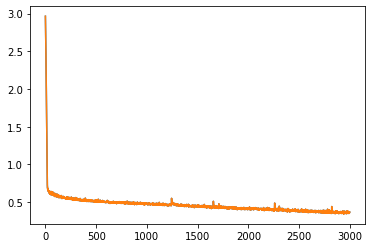

In [32]:
ax = plt.figure().add_subplot()
ax.plot(range(len(mean_absolute_error)),mean_absolute_error,label='train')
ax.plot(range(len(val_mean_absolute_error)),val_mean_absolute_error,label='val')

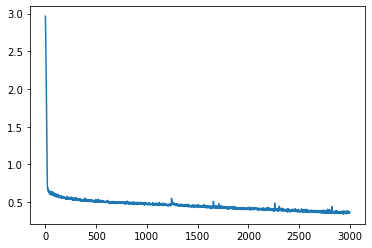

In [33]:
ax = plt.figure().add_subplot()
ax.plot(range(len(val_mean_absolute_error)),val_mean_absolute_error,label='val')

In [34]:
pre = model.predict(Xtest, batch_size=BATCH_SIZE)
print(pre)

[[1.5962338 ]
 [2.6067338 ]
 [1.9654162 ]
 [4.233994  ]
 [0.8451852 ]
 [3.7956305 ]
 [3.3651395 ]
 [1.661133  ]
 [1.8198867 ]
 [3.7377682 ]
 [1.5276458 ]
 [4.5398064 ]
 [4.5702834 ]
 [4.8374596 ]
 [1.6099188 ]
 [1.3190634 ]
 [2.221771  ]
 [3.861603  ]
 [2.5534248 ]
 [1.1256948 ]
 [4.2889504 ]
 [4.930931  ]
 [1.3357337 ]
 [1.3147612 ]
 [2.217035  ]
 [2.7792687 ]
 [4.47467   ]
 [3.3544278 ]
 [3.4119282 ]
 [1.4031942 ]
 [0.9479023 ]
 [1.9361944 ]
 [1.531009  ]
 [2.806348  ]
 [2.8865457 ]
 [3.8125832 ]
 [1.2007473 ]
 [1.3748665 ]
 [1.2967277 ]
 [1.836782  ]
 [3.6741228 ]
 [1.2948511 ]
 [3.7342205 ]
 [3.551514  ]
 [4.575499  ]
 [2.0862255 ]
 [3.728357  ]
 [1.1600338 ]
 [2.0317943 ]
 [4.4754114 ]
 [3.500569  ]
 [2.3034105 ]
 [1.2463691 ]
 [1.5886328 ]
 [3.0456333 ]
 [4.3062477 ]
 [1.1793282 ]
 [3.7168572 ]
 [4.3575716 ]
 [3.287557  ]
 [1.1297853 ]
 [1.7725563 ]
 [2.1682236 ]
 [3.681494  ]
 [2.2808027 ]
 [2.9659693 ]
 [4.9575524 ]
 [0.95840925]
 [1.2103934 ]
 [1.9328709 ]
 [2.319455  ]
 [3.03

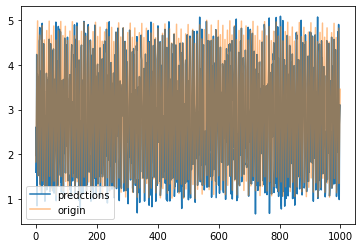

In [36]:
plt.figure()
plt.plot(pre,label='predctions',alpha=1)
plt.plot(Ytest,label='origin',alpha=0.5)
plt.legend(['predctions','origin'])


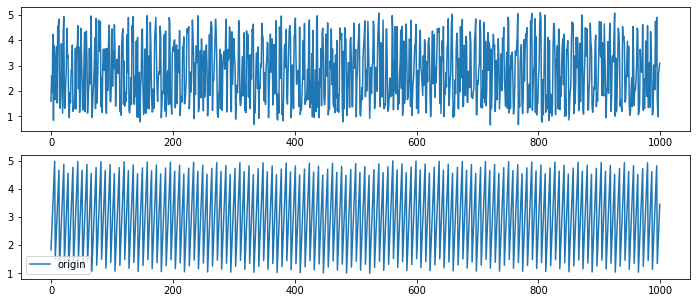

In [37]:
plt.figure(figsize=(12,5))
plt.subplot(211)
plt.plot(pre,label='predctions')
plt.subplot(212)
plt.plot(Ytest,label='origin')
plt.legend()
plt.show()